In [1]:
# import numerical laibary
import numpy as np

# import pandas laibary
import pandas as pd

# import ploting laibary
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Regression Model
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Lasso,Ridge

# Classifier models
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensemble models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# import metrics 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_roc_curve

In [5]:
# load loan dataset
ds=pd.read_csv('loan.csv')
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# fit into frame
df=pd.DataFrame(ds)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df=df.replace(" ",np.nan)   #check white spaces

In [8]:
# columns of dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# top 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# bottom 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
# random row
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
195,LP001665,Male,Yes,1,Graduate,No,3125,2583.0,170.0,360.0,1.0,Semiurban,N


In [12]:
# make credit score as object
df['Credit_History']=df['Credit_History'].astype('str')

In [13]:
type(df['Credit_History'])

pandas.core.series.Series

In [14]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


1. In our dataset 614 rows and 13 columns
2. There are in some variable null values are present
3. In dataset float type is 3 out of 13 columns and int type is 1 out of 13 and object type data is 9 out of 13 columns.

In [15]:
# total null values number
df.isnull().sum().sum()

99

In dataset total null values are present 149

In [16]:
# columns wise null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

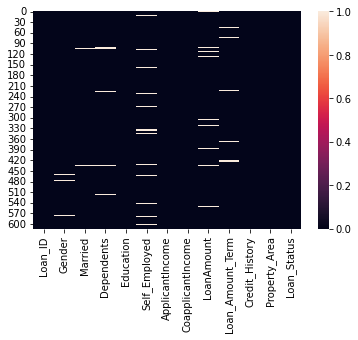

In [17]:
# plot heatmap for null values
sns.heatmap(df.isnull())

# Separate both int and object type data into two different datasets

# Int and Float type dataset

In [18]:
df1=df.select_dtypes(['int','float'])
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [19]:
df1.isnull().sum()  #null values in float and int type datsset

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

Null values are present in 3 columns out of 5:
1. LoanAmount           22
2. Loan_Amount_Term     14

# Apply impute method for removing null values

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imp=SimpleImputer(strategy='median')

In [22]:
for i in df1.columns:
    df1[i]=imp.fit_transform(df1[i].values.reshape(-1,1))

In [23]:
df1  #after apply impute method

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,128.0,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0
...,...,...,...,...
609,2900.0,0.0,71.0,360.0
610,4106.0,0.0,40.0,180.0
611,8072.0,240.0,253.0,360.0
612,7583.0,0.0,187.0,360.0


In [24]:
# check null value safter apply impute method
df1.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [25]:
def numerical_plot(df,variable,target='Loan_Status'):
    
    fig,ax=plt.subplots(ncols=2,figsize=(20,5))
    sns.barplot(x=target,y=variable,data=df,ax=ax[0])
    ax[0].set_title(f'Comparision between Loan_Status and {variable}',fontsize=15)
    
    #distribution plot for variable
    ax[1].set_title(f"Distribution of {variable}",fontsize=15)
    ax[1].set_ylabel('Frequency',fontsize=15)
    sns.distplot(x=df[variable],ax=ax[1],bins=10)
    plt.show()

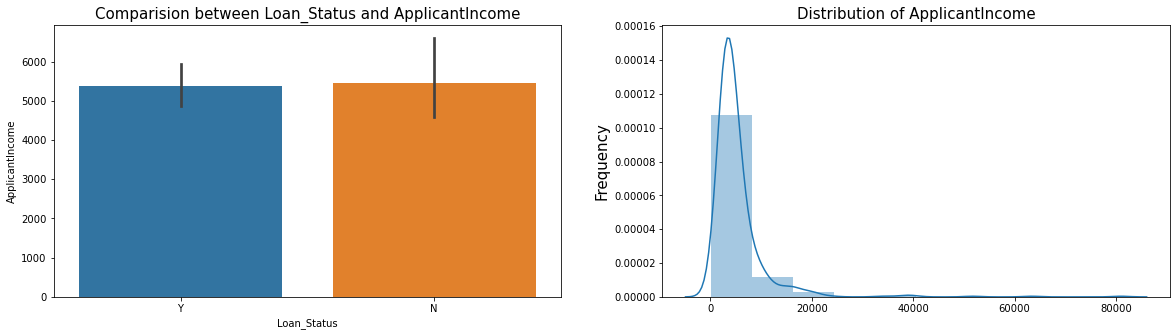

In [26]:
numerical_plot(df,variable='ApplicantIncome')

1. Based on Applicant Income we can not decide whether the loan is given or not. It looks like a not a  sufficient criterion for a loan.
2. Below 10000, many Applicant Incomes vary. It means many Applicant Income is maxed at 10000

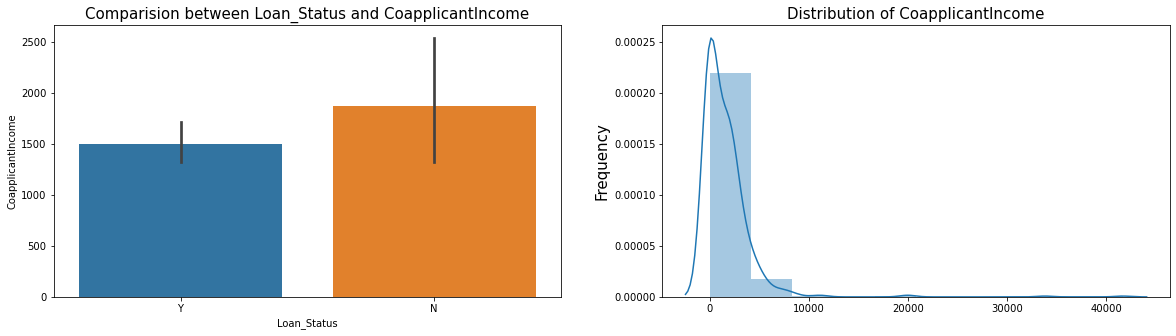

In [27]:
numerical_plot(df,variable='CoapplicantIncome')

1. Co-applicant income -->For a home loan, the most favored co-applicant combination is a couple.
2. It looks like a strong criterion for a loan that is given or not.
3. In this case major times loan is canceled.
4. Co-applicant Income is maxed around 2000-3000.

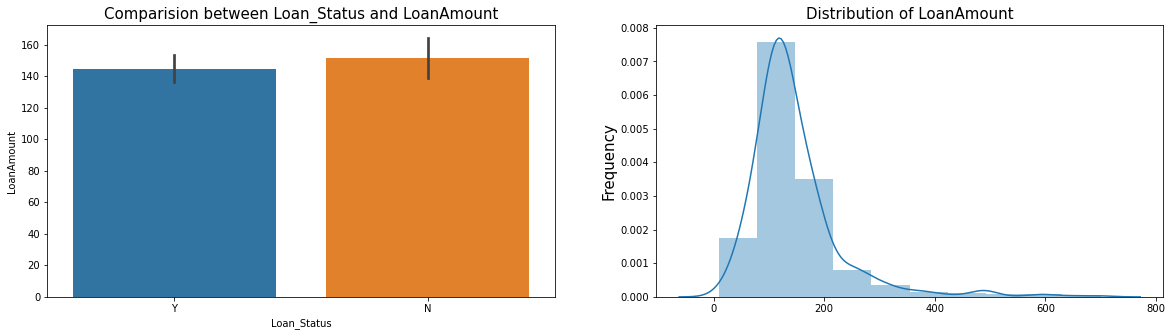

In [28]:
numerical_plot(df,variable='LoanAmount')

1. If the loan amount is greater than a certain limit according to their credit score and income loan is canceled.
2. It looks like a good criterion for a loan is given or not.
3. Maximum loan apply for 100(anything)

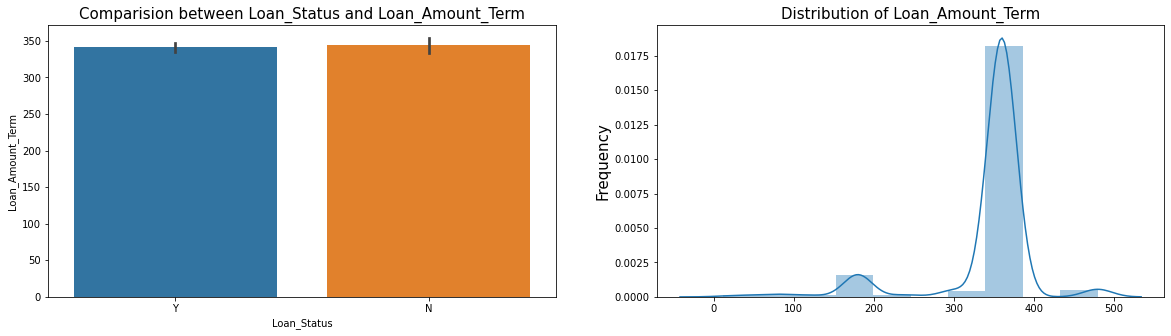

In [29]:
numerical_plot(df,variable='Loan_Amount_Term')

If the loan applicant accepts Loan_Amount_Term then the loan is given else not given.

Some feature not relavent to getting loan, so we drop it--> Loan_Amount_Term

In [30]:
df1=df1.drop(['Loan_Amount_Term'],axis=1)

In [31]:
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849.0,0.0,128.0
1,4583.0,1508.0,128.0
2,3000.0,0.0,66.0
3,2583.0,2358.0,120.0
4,6000.0,0.0,141.0
...,...,...,...
609,2900.0,0.0,71.0
610,4106.0,0.0,40.0
611,8072.0,240.0,253.0
612,7583.0,0.0,187.0


# Object Type Dataset

In [32]:
df2=df.select_dtypes('object')
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [33]:
# null values in object type dataset
df2.isnull().sum()

Loan_ID            0
Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History     0
Property_Area      0
Loan_Status        0
dtype: int64

# Null values are present in object type dataset-->
1. Gender           13
2. Married           3
3. Dependents       15
4. Self_Employed    32

# Remove null values from object type dataset

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imp=SimpleImputer(strategy='most_frequent')

In [36]:
for i in df2.columns:
    df2[i]=imp.fit_transform(df2[i].values.reshape(-1,1))

In [37]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [38]:
# check null values after apply impute method
df2.isnull().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

Nonull values are present

# Unique values

In [39]:
df2['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

Loan_ID is looks like  not important criterion for us so we drop it later.

array(['Male', 'Female'], dtype=object)

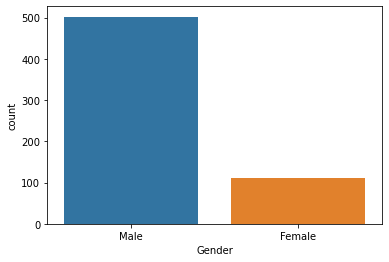

In [40]:
sns.countplot(df2['Gender'])
df2['Gender'].unique()

In loan applicants major number of applications from male person

array(['No', 'Yes'], dtype=object)

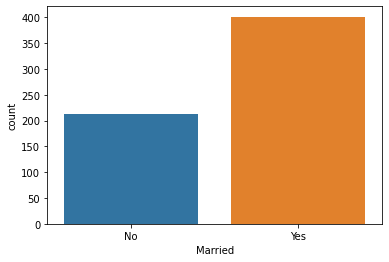

In [41]:
sns.countplot(df2['Married'])
df2['Married'].unique()

More loan application comes from married person

array(['0', '1', '2', '3+'], dtype=object)

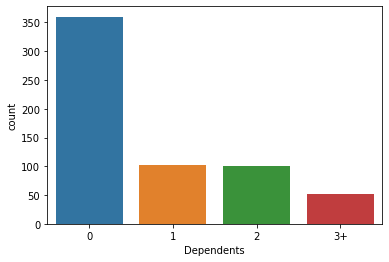

In [42]:
sns.countplot(df2['Dependents'])
df2['Dependents'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

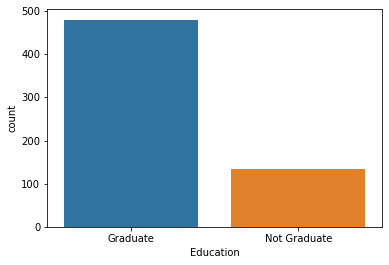

In [43]:
sns.countplot(df2['Education'])
df2['Education'].unique()

More application comes from the graduate person

array(['No', 'Yes'], dtype=object)

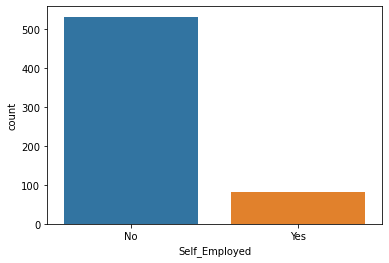

In [44]:
sns.countplot(df2['Self_Employed'])
df2['Self_Employed'].unique()

Many loan applications come from those who is not a self-employed

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

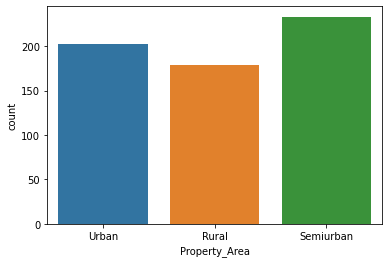

In [45]:
sns.countplot(df2['Property_Area'])
df2['Property_Area'].unique()

Applications comes from Semiurban side

In [46]:
df2['status']=np.where(df2['Loan_Status']=='Y',1,0)  #make status columns od loan_status in int form

In [47]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,status
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,Y,1
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,Y,1
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,Y,1
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,Y,1


In [48]:
def categorical_plot(df,variable,target='status',invert_axis=False):
    
    fig,ax=plt.subplots(ncols=2,figsize=(20,5))
    sns.countplot(x=variable,hue=df2['Loan_Status'],data=df2,ax=ax[0])
    ax[0].set_title(f"Comparision between Loan_Status and {variable}")
    
    #plot bar plot for variable 
    ax[1].set_title(f"distribution of {variable}")
    ax[1].set_ylabel(f"Loan_Status")
    sns.barplot(x=variable,y=target,data=df2)
    plt.tight_layout()
    plt.show()

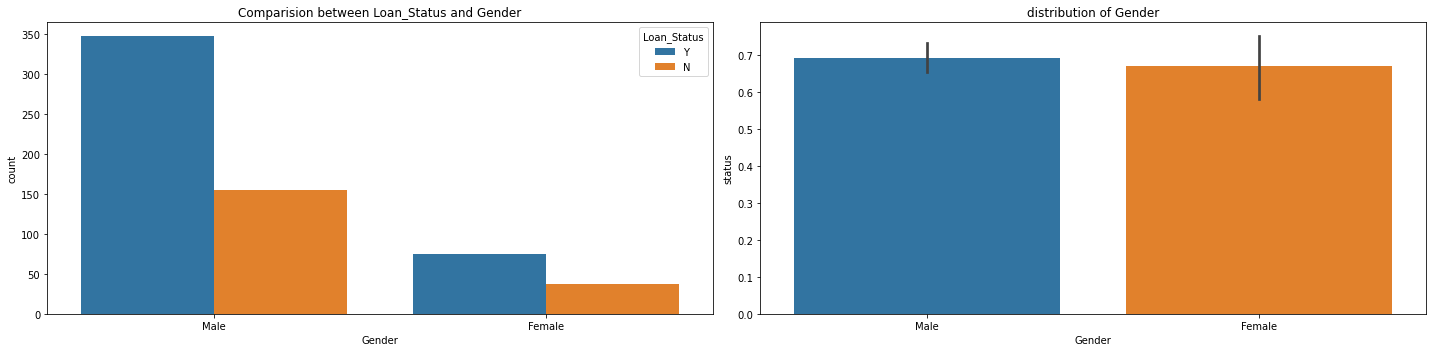

In [49]:
categorical_plot(df2,variable='Gender')

As we see the number of applications comes from the male side and most of the applications select for loan

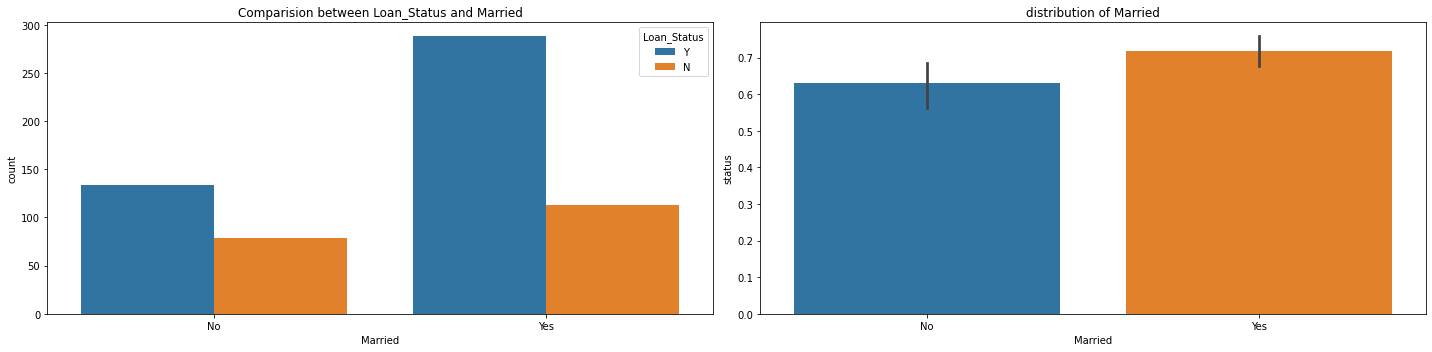

In [50]:
categorical_plot(df2,variable='Married')

Number  of loan pass of married person as we see that

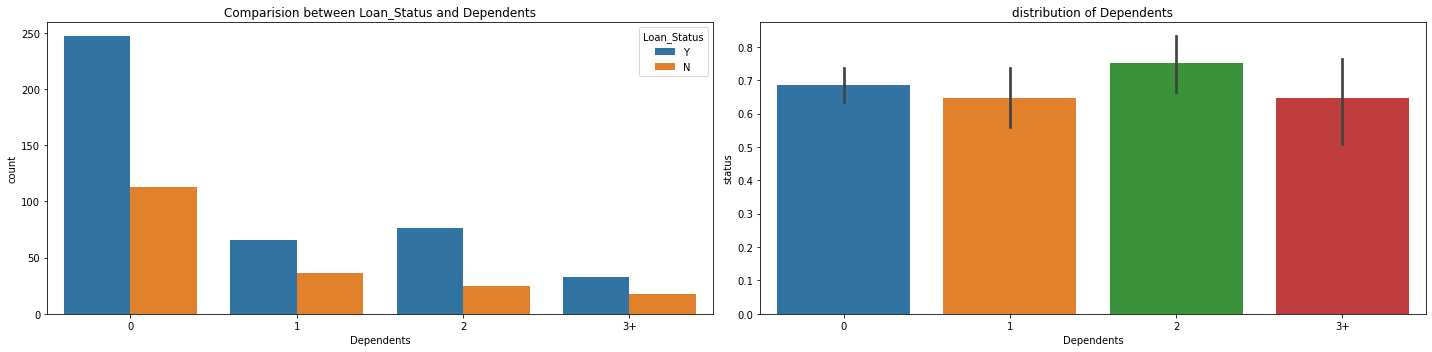

In [51]:
categorical_plot(df2,variable='Dependents')

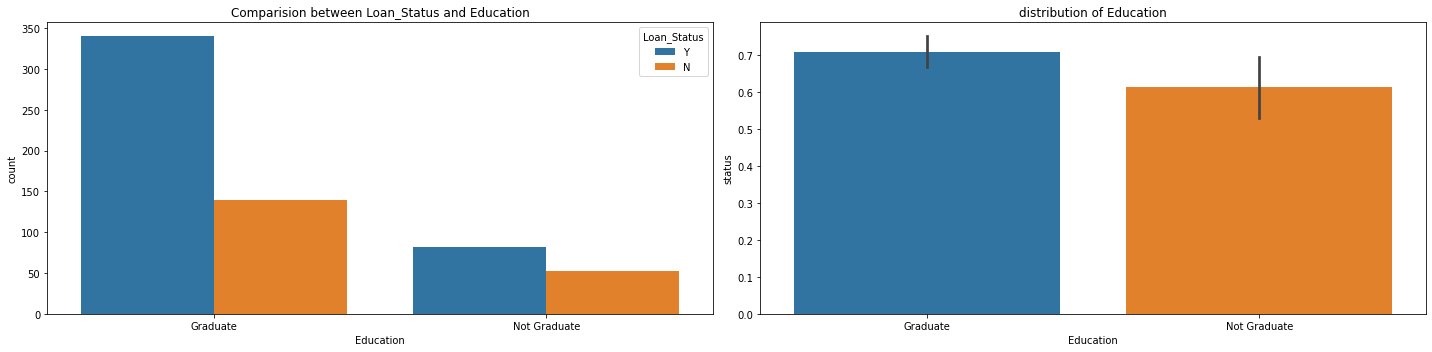

In [52]:
categorical_plot(df2,variable='Education')

If a person is graduating than high chances of getting a loan

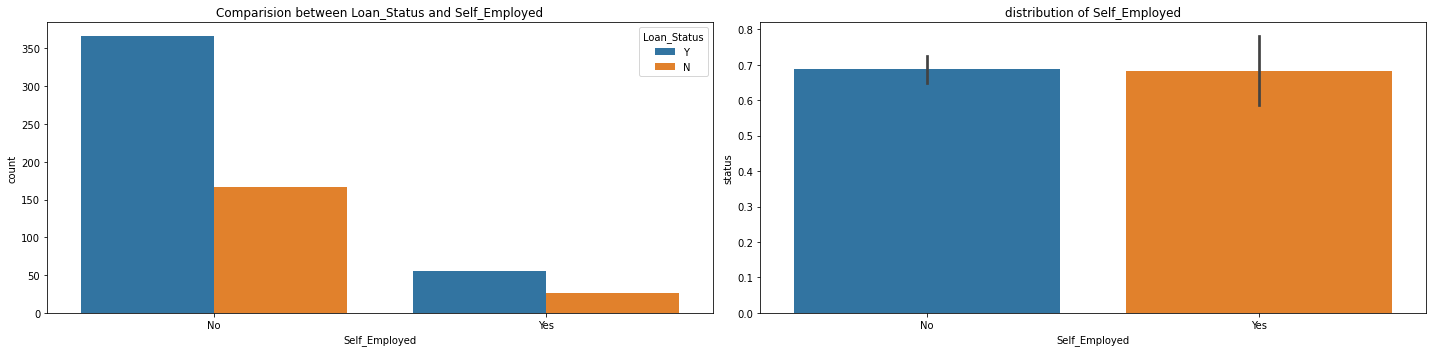

In [53]:
categorical_plot(df2,variable='Self_Employed')

If the person is not self-employed then high chances of getting the loan

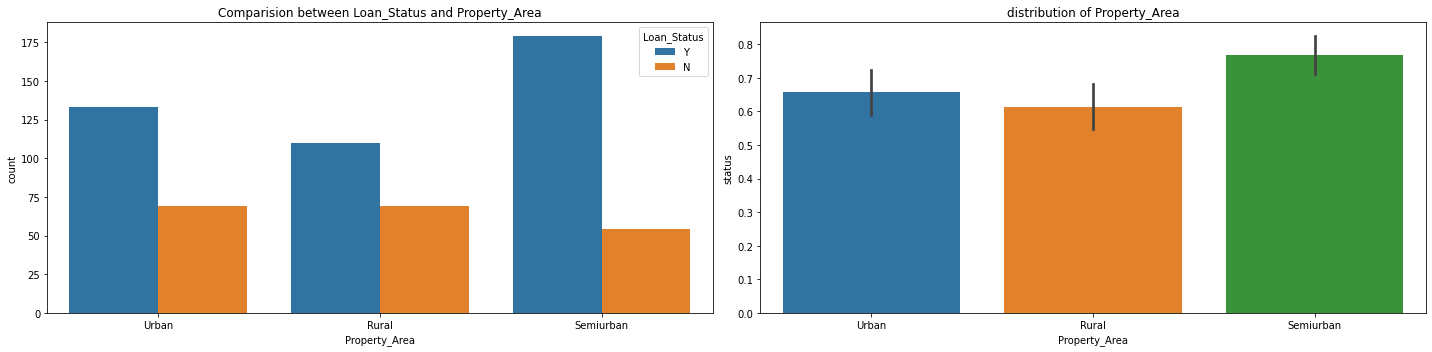

In [54]:
categorical_plot(df2,variable='Property_Area')

If the property is located in a semiurban then the loan is getting easily

Here loan id is not a important feature for loan stats so we drop it

In [55]:
df2=df2.drop(['Loan_ID','status'],axis=1)

In [56]:
df2

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


# Change object to int form by label encoder method

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
for i in df2.columns:
    df2[i]=le.fit_transform(df2[i])

In [60]:
df2

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1
610,1,1,3,0,0,1,0,1
611,1,1,1,0,0,1,2,1
612,1,1,2,0,0,1,2,1


# Merge both dataset

In [61]:
df=pd.concat([df1,df2],axis=1)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,5849.0,0.0,128.0,1,0,0,0,0,1,2,1
1,4583.0,1508.0,128.0,1,1,1,0,0,1,0,0
2,3000.0,0.0,66.0,1,1,0,0,1,1,2,1
3,2583.0,2358.0,120.0,1,1,0,1,0,1,2,1
4,6000.0,0.0,141.0,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,0,0,0,0,0,1,0,1
610,4106.0,0.0,40.0,1,1,3,0,0,1,0,1
611,8072.0,240.0,253.0,1,1,1,0,0,1,2,1
612,7583.0,0.0,187.0,1,1,2,0,0,1,2,1


# Describe statistic

In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,0.817590,0.653094,0.744300,0.218241,0.133550,0.936482,1.037459,0.687296
std,6109.041673,2926.248369,84.107233,0.386497,0.476373,1.009623,0.413389,0.340446,0.471924,0.787482,0.463973
min,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000
max,81000.000000,41667.000000,700.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000


# For better understand plot box plot for outliers(max>75%)

In [63]:
col=df.columns
ncol=6
nrow=2

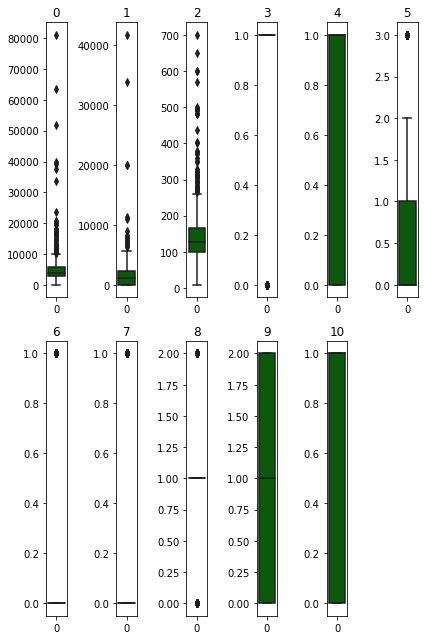

In [64]:
plt.figure(figsize=(ncol,1.5*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='darkgreen',orient='v')
    plt.savefig('Outliers of Loan')
    plt.tight_layout()

Outliers are present in-->ApplicantIncome,CoapplicantIncome,LoanAmount

# Check skewness side

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

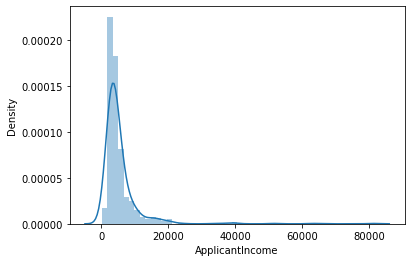

In [65]:
sns.distplot(df['ApplicantIncome'])

Right side skewness is present in Applicant Income variable

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

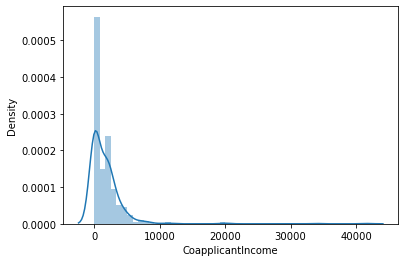

In [66]:
sns.distplot(df['CoapplicantIncome'])

Right side skewness is present in Co-Applicant Income variable

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

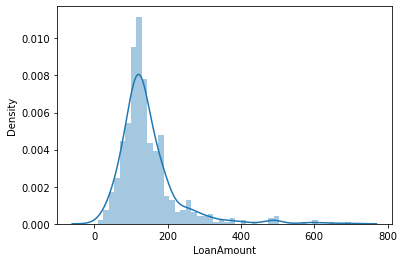

In [67]:
sns.distplot(df['LoanAmount'])

Right side skewness is present in Loan Amount variable

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

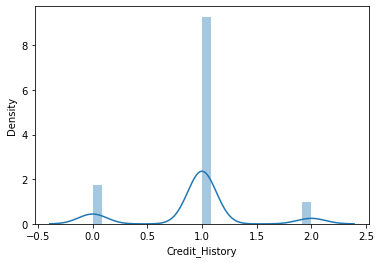

In [68]:
sns.distplot(df['Credit_History'])

Left side skewness is present in Credit History variable

<AxesSubplot:xlabel='Married', ylabel='Density'>

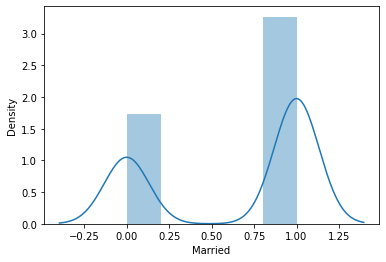

In [69]:
sns.distplot(df['Married'])

Left side skewness is present in Married variable

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

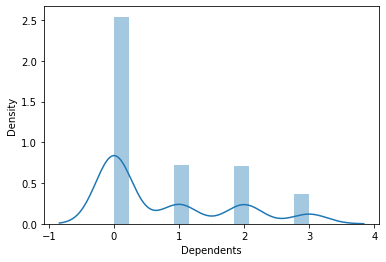

In [70]:
sns.distplot(df['Dependents'])

Right side skewness is present in Dependents variable

<AxesSubplot:xlabel='Education', ylabel='Density'>

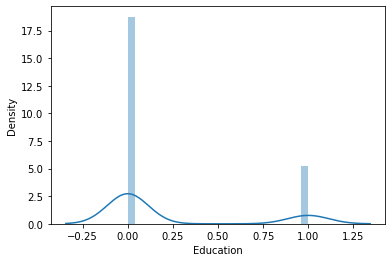

In [71]:
sns.distplot(df['Education'])

It looks like noramal distribution curve

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

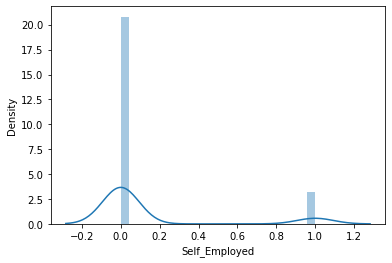

In [72]:
sns.distplot(df['Self_Employed'])

Right side skewness is present in Self_Employed variable

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

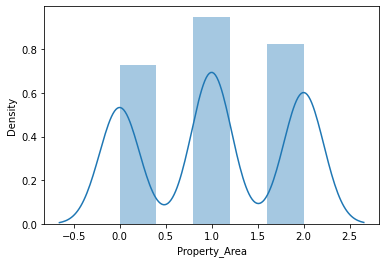

In [73]:
sns.distplot(df['Property_Area'])

Right-Left side skewness is present in Property_Area variable

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

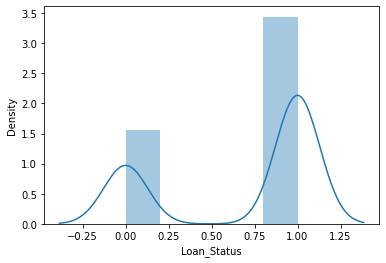

In [74]:
sns.distplot(df['Loan_Status'])

Right-Left side skewness is present in Loan_Status variable

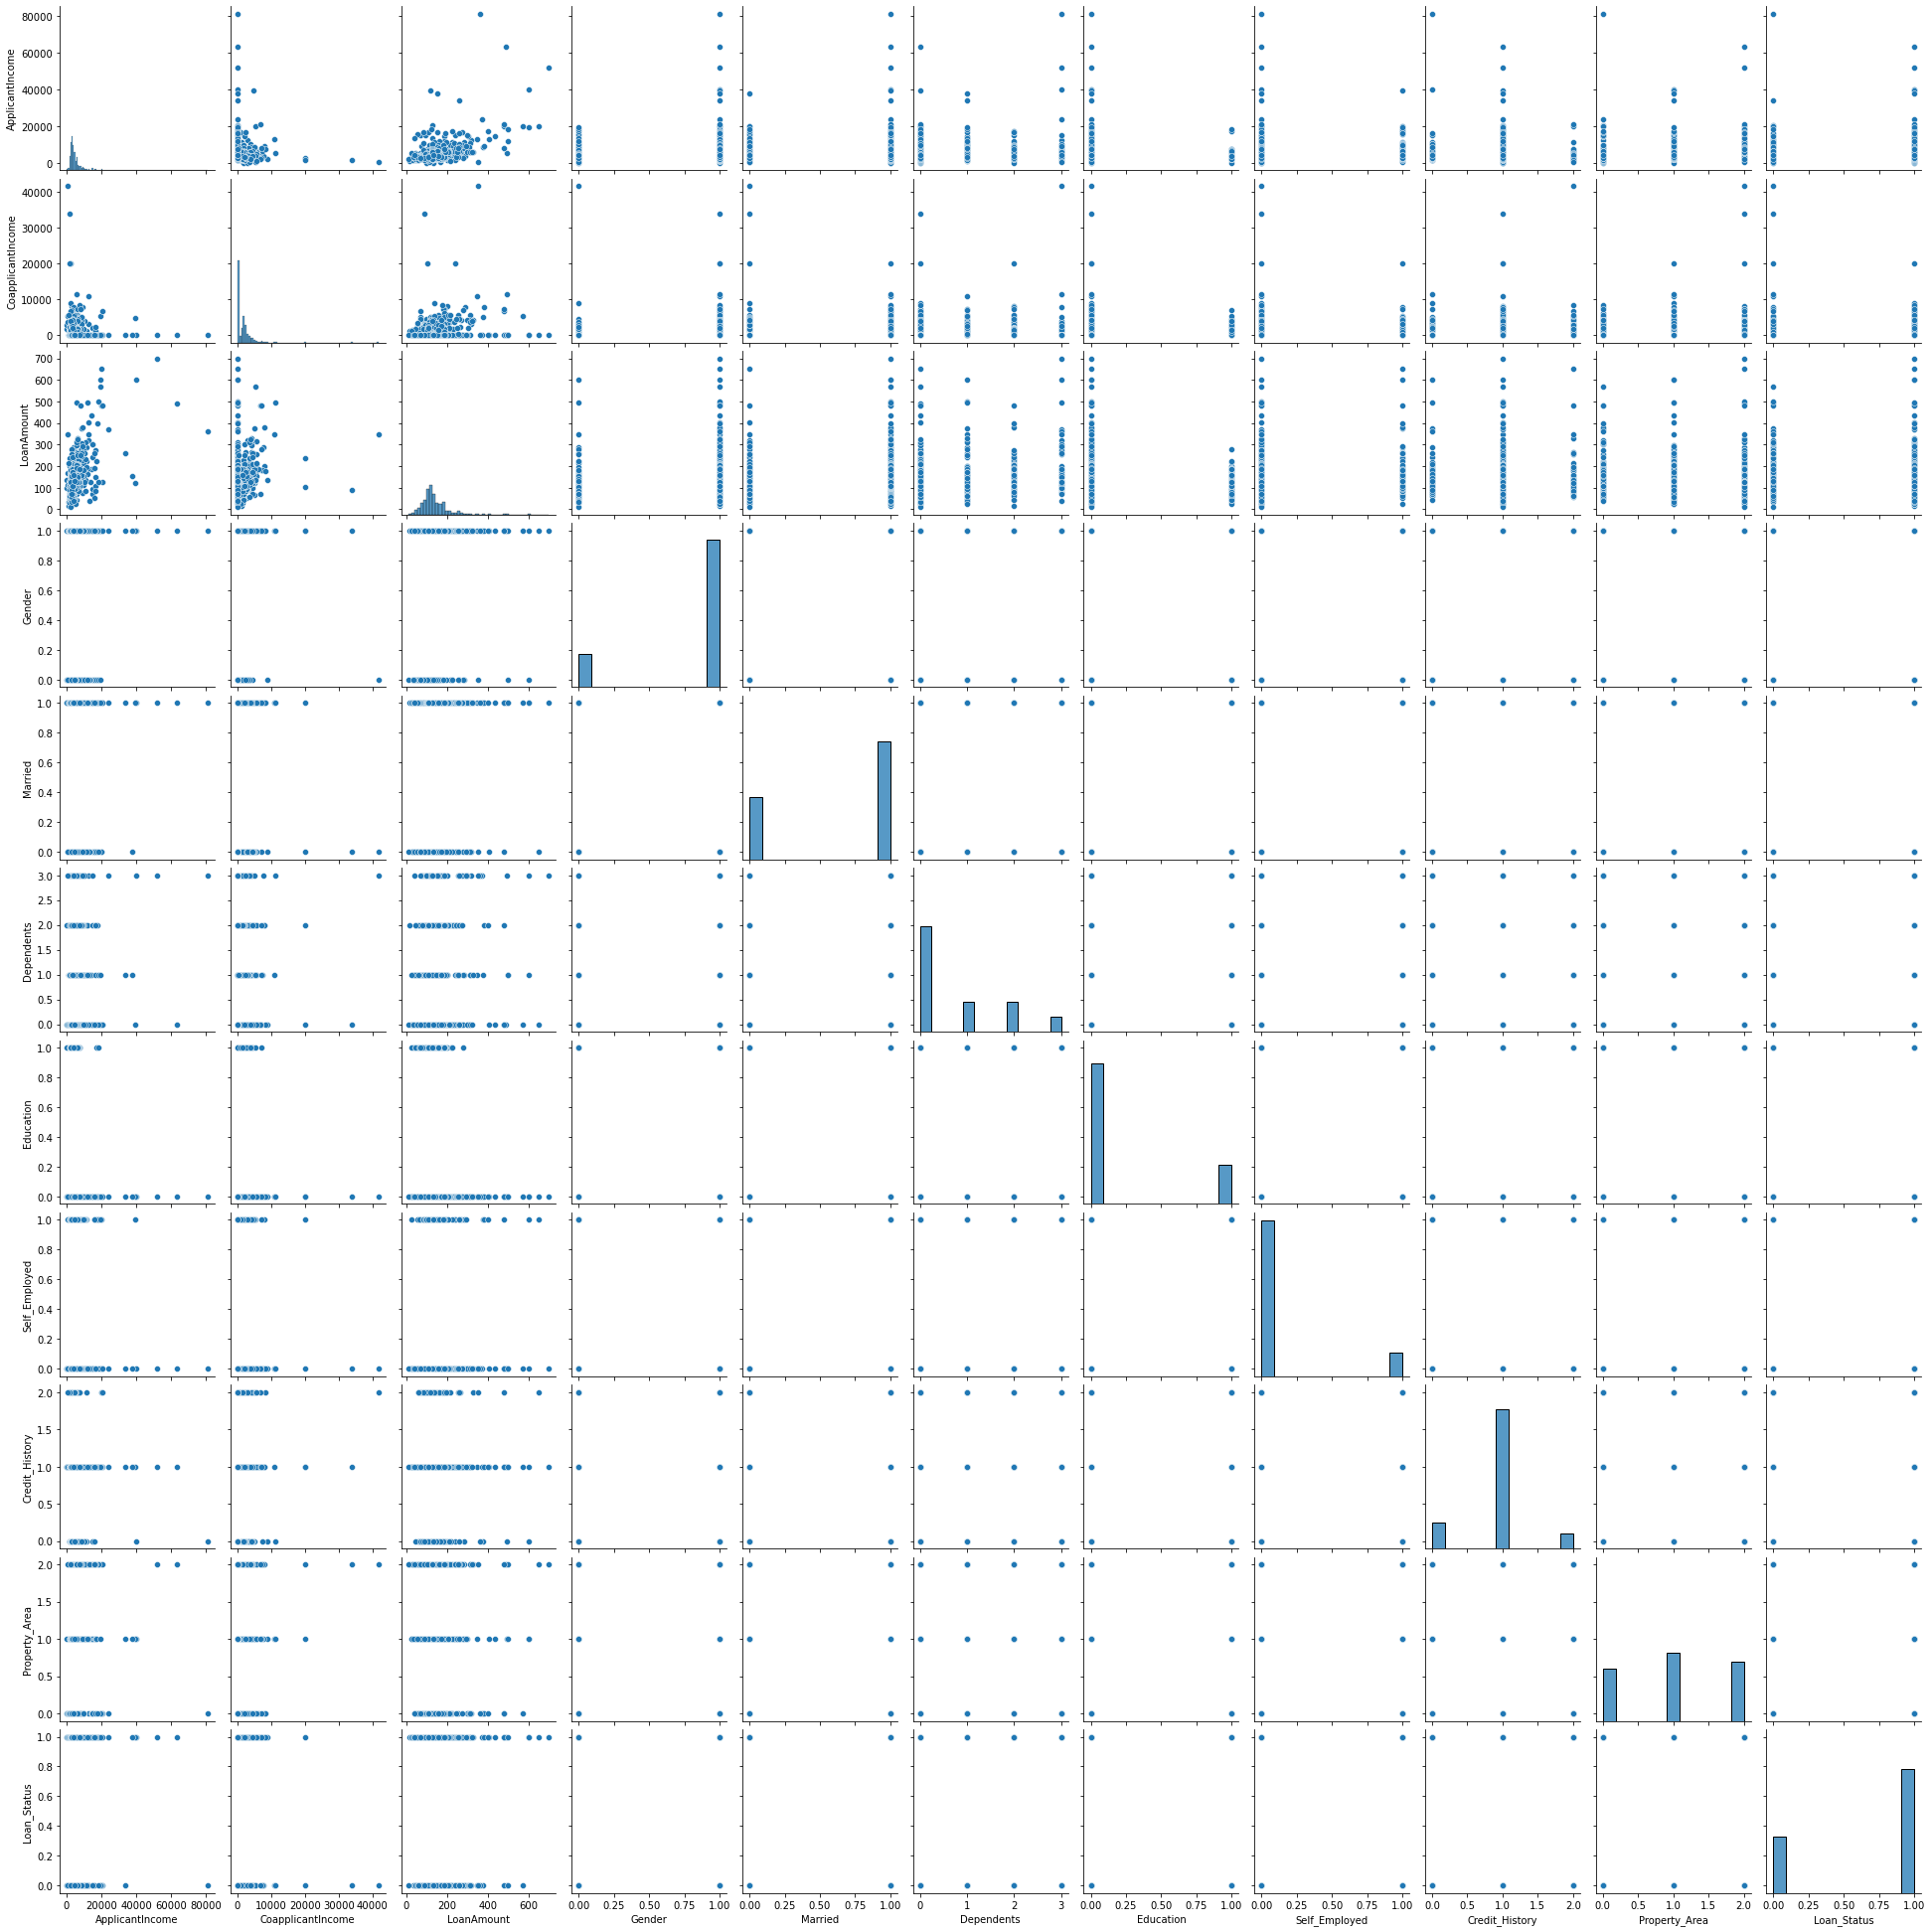

In [75]:
# multivarient plotting
sns.pairplot(df)

# Check Correlation

In [76]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,0.058809,0.051708,0.118202,-0.140760,0.127180,-0.033996,-0.009500,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,0.082912,0.075948,0.030430,-0.062290,-0.016100,0.068806,0.010522,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.106904,0.146546,0.163103,-0.168759,0.115100,0.029688,-0.046632,-0.033214
Gender,0.058809,0.082912,0.106904,1.000000,0.364569,0.172914,0.045364,-0.000525,-0.009963,-0.025752,0.017987
Married,0.051708,0.075948,0.146546,0.364569,1.000000,0.334216,0.012304,0.004489,0.032441,0.004257,0.091478
Dependents,0.118202,0.030430,0.163103,0.172914,0.334216,1.000000,0.055752,0.056798,-0.044415,-0.000244,0.010118
Education,-0.140760,-0.062290,-0.168759,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.037534,-0.065243,-0.085884
Self_Employed,0.127180,-0.016100,0.115100,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.002117,-0.030860,-0.003700
Credit_History,-0.033996,0.068806,0.029688,-0.009963,0.032441,-0.044415,-0.037534,0.002117,1.000000,0.019582,0.423212
Property_Area,-0.009500,0.010522,-0.046632,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,0.019582,1.000000,0.032112


# Better understand plot heatmap of correlation

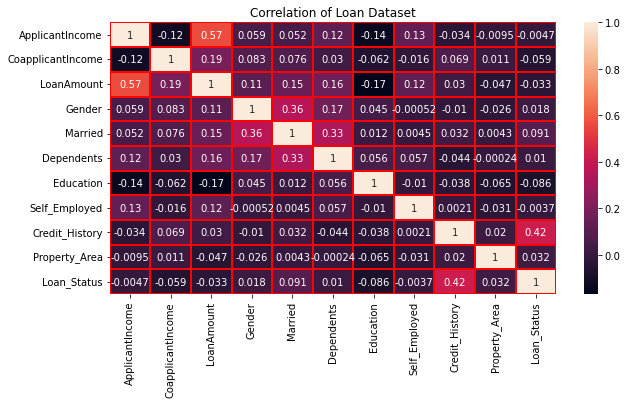

In [77]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linecolor='r',linewidth=2)
plt.title('Correlation of Loan Dataset')
plt.savefig('Correlation of Loan Dataset')
plt.show()

# Correlation in variable and Target->
1. Application Income correlated with target is -0.47%.It is very bad bond.
2. Co-Applicant Income correlated with target is -5.9%.It is good bond.
3. Loan Amount correlated with target is -3.6%.It is good bond.
4. Credit_History correlated with target is 54%.It is very strong bond. 
5. Gender correlated with target is 1.8%.It is good bond.
6. Married correlated with target is 9.1%.It is it is good bond.
7. Dependents correlated with target is 1%.It is it is poor bond.
8. Education correlated with target is -8.6%.It is good bond.
9. Self Employed correlated with target is -0.37%.It is very bad bond. 
10. Property Area correlated with target is 3.2%.It is good bond.

# Remove outliers

Drop Applicant income and Self employed variable columns,they not make good bond with Target

In [78]:
df2=df2.drop(['Self_Employed'],axis=1)

In [79]:
df1=df1.drop(['ApplicantIncome'],axis=1)

In [80]:
from scipy.stats import zscore

In [81]:
(np.abs(zscore(df1))<3).all().all()  #check outluers in int dataset

False

Outliers are present

In [82]:
(np.abs(zscore(df1))<3).all()

CoapplicantIncome    False
LoanAmount           False
dtype: bool

Outliers are present-->
1. CoapplicantIncome-->    False
2. mLoanAmount -->          False

# IQR METHOD

In [83]:
q1=df1.quantile(0.25)
q1

CoapplicantIncome      0.00
LoanAmount           100.25
Name: 0.25, dtype: float64

In [84]:
q2=df1.quantile(0.75)
q2

CoapplicantIncome    2297.25
LoanAmount            164.75
Name: 0.75, dtype: float64

In [85]:
iqr=q2-q1
iqr

CoapplicantIncome    2297.25
LoanAmount             64.50
dtype: float64

In [86]:
upper=q2+(1.5*iqr)
lower=q1-(1.5*iqr)

In [87]:
df3=df1[(df1>lower) & (df1<upper)]
df3

,CoapplicantIncome,LoanAmount
0,0.0,128.0
1,1508.0,128.0
2,0.0,66.0
3,2358.0,120.0
4,0.0,141.0
...,...,...
609,0.0,71.0
610,0.0,40.0
611,240.0,253.0
612,0.0,187.0


In [88]:
# Check null value
df3.isnull().sum()

CoapplicantIncome    18
LoanAmount           41
dtype: int64

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
imp=SimpleImputer(strategy='median')

In [91]:
for i in df3.columns:
    df3[i]=imp.fit_transform(df3[i].values.reshape(-1,1))

In [92]:
df3

,CoapplicantIncome,LoanAmount
0,0.0,128.0
1,1508.0,128.0
2,0.0,66.0
3,2358.0,120.0
4,0.0,141.0
...,...,...
609,0.0,71.0
610,0.0,40.0
611,240.0,253.0
612,0.0,187.0


Null values are not presnt

# Remove skewness

In [93]:
df3.skew()

CoapplicantIncome    0.944873
LoanAmount           0.511482
dtype: float64

If take threshold value +/-0.5 then skewness are present in all variable

# APPLY METHOD FOR REMOVEING SKEWNESS

# Power Transformation Method

In [94]:
from sklearn.preprocessing import power_transform

In [95]:
x=power_transform(df3)   

In [96]:
type(x)

numpy.ndarray

In [97]:
x=pd.DataFrame(x,columns=df3.columns)

In [98]:
x.skew()  #skewness after apply tarnsformation method

CoapplicantIncome   -0.167634
LoanAmount           0.055035
dtype: float64

Skweness comes under threhold value +/-0.5,and it look like good.

# merge both dataset

In [99]:
df=pd.concat([x,df2],axis=1)
df

,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Credit_History,Property_Area,Loan_Status
0,-1.106139,0.053116,1,0,0,0,1,2,1
1,0.787676,0.053116,1,1,1,0,1,0,0
2,-1.106139,-1.462829,1,1,0,0,1,2,1
3,0.936495,-0.126119,1,1,0,1,1,2,1
4,-1.106139,0.336784,1,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...
609,-1.106139,-1.326984,0,0,0,0,1,0,1
610,-1.106139,-2.233511,1,1,3,0,1,0,1
611,0.221699,2.507010,1,1,1,0,1,2,1
612,-1.106139,1.278827,1,1,2,0,1,2,1


# Check Multicolonility

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['variable']=df.columns
    vif['factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return[vif]

In [102]:
calc_vif(df)

[            variable    factor
 0  CoapplicantIncome  1.141627
 1         LoanAmount  1.088968
 2             Gender  4.772859
 3            Married  3.941303
 4         Dependents  1.793029
 5          Education  1.289110
 6     Credit_History  4.920285
 7      Property_Area  2.431949
 8        Loan_Status  3.844263]

multicolonilitty present in dataset Gender so drop it

In [104]:
df=df.drop(['Gender'],axis=1)

# Check values of Loan_Status variable 

In [105]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# Split dataset into Independent and Dependent Variable

In [106]:
y=df.Loan_Status

In [107]:
x=df.drop(['Loan_Status'],axis=1)

# Our values are not equal so we apply SMOTE Method

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
sm=SMOTE()

In [110]:
x,y=sm.fit_resample(x,y)

In [111]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Now our data is equal in target 

# Apply Standard Scaler Method

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
st=StandardScaler()

In [114]:
x=st.fit_transform(x)

In [115]:
x

array([[-1.05668905,  0.01564131, -1.22353644, ..., -0.50591737,
         0.3526882 ,  1.28755176],
       [ 0.82972986,  0.01564131,  0.817303  , ..., -0.50591737,
         0.3526882 , -1.22794289],
       [-1.05668905, -1.50125715,  0.817303  , ..., -0.50591737,
         0.3526882 ,  1.28755176],
       ...,
       [ 0.93542765,  1.20330721,  0.817303  , ..., -0.50591737,
         0.3526882 , -1.22794289],
       [-1.05668905, -1.87550389, -1.22353644, ...,  1.97660738,
        -1.58022634,  0.02980444],
       [ 1.03419336, -0.34340186,  0.817303  , ..., -0.50591737,
         0.3526882 ,  1.28755176]])

In [116]:
x.shape

(844, 7)

In [117]:
y.shape

(844,)

# Apply Diffrent Model Selection For find Best Model

# TRAIN_TEST_SPLIT METHOD

In [118]:
LO=LogisticRegression()
LA=Lasso()
RI=Ridge()
GA=GaussianNB()
MU=MultinomialNB()
DT=DecisionTreeClassifier()
SV=SVC()
KN=KNeighborsClassifier()
AD=AdaBoostClassifier()
GR=GradientBoostingClassifier()
RF=RandomForestClassifier()

# MODEL-->LOGISTIC REGRESSION

In [119]:
max_acc=0
max_rand=0
for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LO.fit(x_train,y_train)
    pred=LO.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 66.86390532544378
Max Accuracy 66.86390532544378 at random_state 0


At random_state 1 model give accuracy--> 71.00591715976331
Max Accuracy 71.00591715976331 at random_state 1


At random_state 2 model give accuracy--> 69.8224852071006
At random_state 3 model give accuracy--> 69.23076923076923
At random_state 4 model give accuracy--> 72.7810650887574
Max Accuracy 72.7810650887574 at random_state 4


At random_state 5 model give accuracy--> 75.14792899408283
Max Accuracy 75.14792899408283 at random_state 5


At random_state 6 model give accuracy--> 76.33136094674556
Max Accuracy 76.33136094674556 at random_state 6


At random_state 7 model give accuracy--> 73.96449704142012
At random_state 8 model give accuracy--> 71.00591715976331
At random_state 9 model give accuracy--> 75.14792899408283
At random_state 10 model give accuracy--> 73.37278106508876
At random_state 11 model give accuracy--> 77.51479289940828
Max Accuracy 77.51479289940828 at rand

At random state 11 model give accuracy 77.51%

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=11)
LO.fit(x_train,y_train)
pred_test=LO.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(LO.score(x_train,y_train))*100}")

Confusion Matrix : [[57 26]
 [12 74]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.69      0.75        83
           1       0.74      0.86      0.80        86

    accuracy                           0.78       169
   macro avg       0.78      0.77      0.77       169
weighted avg       0.78      0.78      0.77       169

Accuracy Score  : 77.51479289940828
Dataset Score : 71.4074074074074


1. Model give accuracy near-->77.51%
2. chances of getting loan is 74%
3. Average-->78%

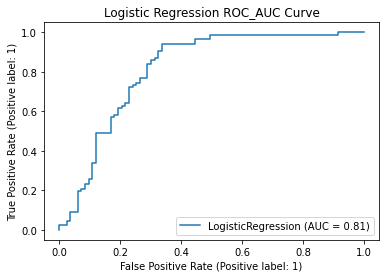

In [121]:
plot_roc_curve(LO,x_test,y_test)
plt.title('Logistic Regression ROC_AUC Curve')
plt.show()

Model give AUC Score 81%

# MODEL-->GAUSSIAN CLASSIFIER

In [122]:
max_acc=0
max_rand=0
for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GA.fit(x_train,y_train)
    pred=GA.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 71.59763313609467
Max Accuracy 71.59763313609467 at random_state 0


At random_state 1 model give accuracy--> 66.27218934911244
At random_state 2 model give accuracy--> 70.41420118343196
At random_state 3 model give accuracy--> 68.04733727810651
At random_state 4 model give accuracy--> 73.37278106508876
Max Accuracy 73.37278106508876 at random_state 4


At random_state 5 model give accuracy--> 69.8224852071006
At random_state 6 model give accuracy--> 73.37278106508876
At random_state 7 model give accuracy--> 75.7396449704142
Max Accuracy 75.7396449704142 at random_state 7


At random_state 8 model give accuracy--> 69.23076923076923
At random_state 9 model give accuracy--> 72.7810650887574
At random_state 10 model give accuracy--> 67.45562130177515
At random_state 11 model give accuracy--> 75.14792899408283
At random_state 12 model give accuracy--> 71.59763313609467
At random_state 13 model give accuracy--> 70.41420118343196
At random_state 14 mo

At random state 7 model give accuarcy score 75.73%

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)
GA.fit(x_train,y_train)
pred=GA.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={GA.score(x_train,y_train)*100}")

Confusion_Matrix= [[63 28]
 [13 65]]
Classification_Report=               precision    recall  f1-score   support

           0       0.83      0.69      0.75        91
           1       0.70      0.83      0.76        78

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.77      0.76      0.76       169

Accuracy_Score= 75.7396449704142
Dataset_Score=72.14814814814815


1. Loan getting chance is 70%
2. Average-->76%
3. Accuracy Of Model-->75.73%

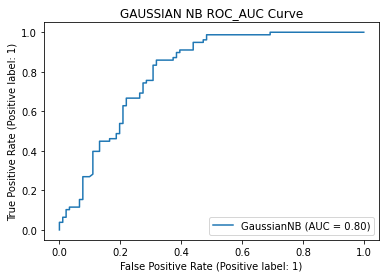

In [124]:
plot_roc_curve(GA,x_test,y_test)
plt.title('GAUSSIAN NB ROC_AUC Curve')
plt.show()

Model give AUC Score is 80%

# MODEL--> DECISON TREE CLASSIFIER

In [125]:
max_acc=0
max_rand=0
for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    DT.fit(x_train,y_train)
    pred=DT.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 66.86390532544378
Max Accuracy 66.86390532544378 at random_state 0


At random_state 1 model give accuracy--> 72.7810650887574
Max Accuracy 72.7810650887574 at random_state 1


At random_state 2 model give accuracy--> 72.7810650887574
At random_state 3 model give accuracy--> 71.00591715976331
At random_state 4 model give accuracy--> 79.88165680473372
Max Accuracy 79.88165680473372 at random_state 4


At random_state 5 model give accuracy--> 73.96449704142012
At random_state 6 model give accuracy--> 72.18934911242604
At random_state 7 model give accuracy--> 72.7810650887574
At random_state 8 model give accuracy--> 65.68047337278107
At random_state 9 model give accuracy--> 75.14792899408283
At random_state 10 model give accuracy--> 67.45562130177515
At random_state 11 model give accuracy--> 72.18934911242604
At random_state 12 model give accuracy--> 66.27218934911244
At random_state 13 model give accuracy--> 68.63905325443787
At random_state 14 mo

At random_state 4 model give accuracy score 79.88%

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={DT.score(x_train,y_train)*100}")

Confusion_Matrix= [[64 21]
 [14 70]]
Classification_Report=               precision    recall  f1-score   support

           0       0.82      0.75      0.79        85
           1       0.77      0.83      0.80        84

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.80      0.79      0.79       169

Accuracy_Score= 79.28994082840237
Dataset_Score=99.55555555555556


1. Loan getting chances by this moddel is 77%
2. Average-->79%
3. Accuracy_score-->79.28%
4. It is better than previous,check another models for finding best score 

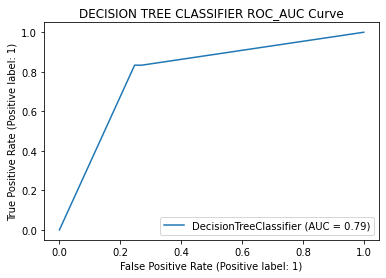

In [127]:
plot_roc_curve(DT,x_test,y_test)
plt.title('DECISION TREE CLASSIFIER ROC_AUC Curve')
plt.show()

Model give AUC SCORE 79%

# MODEL-->SVC

In [128]:
max_acc=0
max_rand=0
for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    pred=SV.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 72.18934911242604
Max Accuracy 72.18934911242604 at random_state 0


At random_state 1 model give accuracy--> 73.96449704142012
Max Accuracy 73.96449704142012 at random_state 1


At random_state 2 model give accuracy--> 73.37278106508876
At random_state 3 model give accuracy--> 71.59763313609467
At random_state 4 model give accuracy--> 73.37278106508876
At random_state 5 model give accuracy--> 79.28994082840237
Max Accuracy 79.28994082840237 at random_state 5


At random_state 6 model give accuracy--> 71.00591715976331
At random_state 7 model give accuracy--> 73.96449704142012
At random_state 8 model give accuracy--> 72.7810650887574
At random_state 9 model give accuracy--> 77.51479289940828
At random_state 10 model give accuracy--> 69.8224852071006
At random_state 11 model give accuracy--> 77.51479289940828
At random_state 12 model give accuracy--> 77.51479289940828
At random_state 13 model give accuracy--> 72.18934911242604
At random_state 14 

At random state 5 model give accuracy scoer is 79.28%

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={SV.score(x_train,y_train)*100}")

Confusion_Matrix= [[50 29]
 [ 6 84]]
Classification_Report=               precision    recall  f1-score   support

           0       0.89      0.63      0.74        79
           1       0.74      0.93      0.83        90

    accuracy                           0.79       169
   macro avg       0.82      0.78      0.78       169
weighted avg       0.81      0.79      0.79       169

Accuracy_Score= 79.28994082840237
Dataset_Score=77.33333333333333


1. loan getting chances is only 74%
2. Average-->82%
3. Accuracy_score-->79.28%
4. It is better than previous model,so find more best model

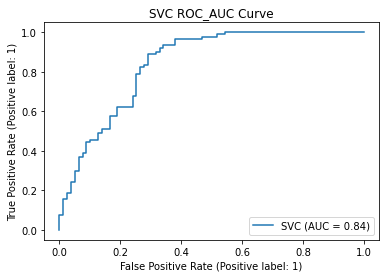

In [130]:
plot_roc_curve(SV,x_test,y_test)
plt.title('SVC ROC_AUC Curve')
plt.show()

Model give AUC SCORE 84%

# MODEL-->KNEIGHBORS CLASSIFIER

In [131]:
max_acc=0
max_rand=0
for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    pred=KN.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 71.59763313609467
Max Accuracy 71.59763313609467 at random_state 0


At random_state 1 model give accuracy--> 74.55621301775149
Max Accuracy 74.55621301775149 at random_state 1


At random_state 2 model give accuracy--> 72.18934911242604
At random_state 3 model give accuracy--> 69.23076923076923
At random_state 4 model give accuracy--> 73.37278106508876
At random_state 5 model give accuracy--> 72.7810650887574
At random_state 6 model give accuracy--> 72.7810650887574
At random_state 7 model give accuracy--> 72.7810650887574
At random_state 8 model give accuracy--> 72.7810650887574
At random_state 9 model give accuracy--> 76.33136094674556
Max Accuracy 76.33136094674556 at random_state 9


At random_state 10 model give accuracy--> 72.7810650887574
At random_state 11 model give accuracy--> 72.18934911242604
At random_state 12 model give accuracy--> 71.59763313609467
At random_state 13 model give accuracy--> 73.37278106508876
At random_state 14 mod

At random state 9 model give accuracy score 76.33%

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=9)
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={KN.score(x_train,y_train)*100}")

Confusion_Matrix= [[57 22]
 [18 72]]
Classification_Report=               precision    recall  f1-score   support

           0       0.76      0.72      0.74        79
           1       0.77      0.80      0.78        90

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.76      0.76      0.76       169

Accuracy_Score= 76.33136094674556
Dataset_Score=82.07407407407408


1. loan getting chances is only 77%
2. Average-->76%
3. Accuracy_score-->76.33%
4. It is  better than previous model,so find more best modEL

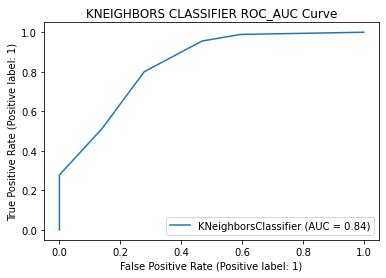

In [133]:
plot_roc_curve(KN,x_test,y_test)
plt.title('KNEIGHBORS CLASSIFIER ROC_AUC Curve')
plt.show()

Model give AUC SCORE 84%

# MODEL-->ADA BOOST CLASSIFIER

In [134]:
max_acc=0
max_rand=0
for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    pred=AD.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 65.68047337278107
Max Accuracy 65.68047337278107 at random_state 0


At random_state 1 model give accuracy--> 71.59763313609467
Max Accuracy 71.59763313609467 at random_state 1


At random_state 2 model give accuracy--> 71.00591715976331
At random_state 3 model give accuracy--> 71.00591715976331
At random_state 4 model give accuracy--> 71.59763313609467
At random_state 5 model give accuracy--> 77.51479289940828
Max Accuracy 77.51479289940828 at random_state 5


At random_state 6 model give accuracy--> 72.18934911242604
At random_state 7 model give accuracy--> 73.37278106508876
At random_state 8 model give accuracy--> 68.04733727810651
At random_state 9 model give accuracy--> 75.14792899408283
At random_state 10 model give accuracy--> 69.8224852071006
At random_state 11 model give accuracy--> 73.96449704142012
At random_state 12 model give accuracy--> 77.51479289940828
At random_state 13 model give accuracy--> 69.23076923076923
At random_state 14

AT random state 5 model give accuracy score 77.51%

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={AD.score(x_train,y_train)*100}")

Confusion_Matrix= [[53 26]
 [12 78]]
Classification_Report=               precision    recall  f1-score   support

           0       0.82      0.67      0.74        79
           1       0.75      0.87      0.80        90

    accuracy                           0.78       169
   macro avg       0.78      0.77      0.77       169
weighted avg       0.78      0.78      0.77       169

Accuracy_Score= 77.51479289940828
Dataset_Score=77.92592592592592


1. loan getting chances is only 75%
2. Average-->78%
3. Accuracy_score-->77.51%
4. It is better than previous model,so find more best model

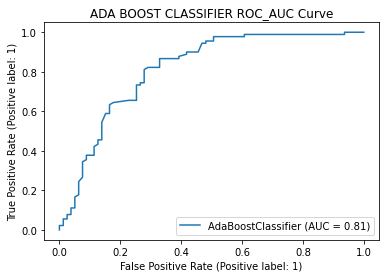

In [136]:
plot_roc_curve(AD,x_test,y_test)
plt.title('ADA BOOST CLASSIFIER ROC_AUC Curve')
plt.show()

Model give AUC SCORE 81%

# MODEL-->GRADIENT BOOSTING CLASSIFIER

In [137]:
max_acc=0
max_rand=0
for i in range(0,30):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GR.fit(x_train,y_train)
    pred=GR.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 69.23076923076923
Max Accuracy 69.23076923076923 at random_state 0


At random_state 1 model give accuracy--> 76.33136094674556
Max Accuracy 76.33136094674556 at random_state 1


At random_state 2 model give accuracy--> 71.59763313609467
At random_state 3 model give accuracy--> 69.8224852071006
At random_state 4 model give accuracy--> 74.55621301775149
At random_state 5 model give accuracy--> 77.51479289940828
Max Accuracy 77.51479289940828 at random_state 5


At random_state 6 model give accuracy--> 70.41420118343196
At random_state 7 model give accuracy--> 75.7396449704142
At random_state 8 model give accuracy--> 73.37278106508876
At random_state 9 model give accuracy--> 80.4733727810651
Max Accuracy 80.4733727810651 at random_state 9


At random_state 10 model give accuracy--> 69.8224852071006
At random_state 11 model give accuracy--> 77.51479289940828
At random_state 12 model give accuracy--> 74.55621301775149
At random_state 13 model give a

Ar random_state 9 model give accuracy score 80.47%

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=9)
GR.fit(x_train,y_train)
pred=GR.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={GR.score(x_train,y_train)*100}")

Confusion_Matrix= [[55 24]
 [ 9 81]]
Classification_Report=               precision    recall  f1-score   support

           0       0.86      0.70      0.77        79
           1       0.77      0.90      0.83        90

    accuracy                           0.80       169
   macro avg       0.82      0.80      0.80       169
weighted avg       0.81      0.80      0.80       169

Accuracy_Score= 80.4733727810651
Dataset_Score=83.55555555555556


1. loan getting chances is only 77%
2. Average-->82%
3. Accuracy_score-->80.47%
4. It is  better than previous model,so find more best model

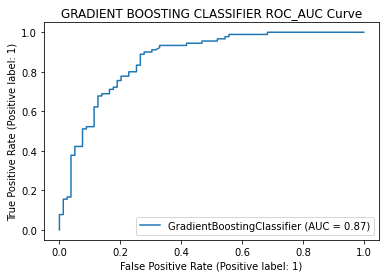

In [139]:
plot_roc_curve(GR,x_test,y_test)
plt.title('GRADIENT BOOSTING CLASSIFIER ROC_AUC Curve')
plt.show()

Model giev AUC SCOER is 87%

# MODEL-->RANDOM FOREST CLASSIFIER

In [141]:
max_acc=0
max_rand=0
for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    accuracy=accuracy_score(y_test,pred)*100
    print(f"At random_state {i} model give accuracy--> {accuracy}")
    if accuracy>max_acc:
        max_acc=accuracy
        max_rand=i
        print(f"Max Accuracy {max_acc} at random_state {max_rand}")
        print('\n')

At random_state 0 model give accuracy--> 74.55621301775149
Max Accuracy 74.55621301775149 at random_state 0


At random_state 1 model give accuracy--> 78.69822485207101
Max Accuracy 78.69822485207101 at random_state 1


At random_state 2 model give accuracy--> 78.10650887573965
At random_state 3 model give accuracy--> 75.14792899408283
At random_state 4 model give accuracy--> 73.96449704142012
At random_state 5 model give accuracy--> 76.33136094674556
At random_state 6 model give accuracy--> 76.33136094674556
At random_state 7 model give accuracy--> 75.7396449704142
At random_state 8 model give accuracy--> 72.7810650887574
At random_state 9 model give accuracy--> 80.4733727810651
Max Accuracy 80.4733727810651 at random_state 9


At random_state 10 model give accuracy--> 76.33136094674556
At random_state 11 model give accuracy--> 78.10650887573965
At random_state 12 model give accuracy--> 78.69822485207101
At random_state 13 model give accuracy--> 75.7396449704142
At random_state 14 mod

At random state 6 model give accuracy 82.24%

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=9)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print(f"Confusion_Matrix= {confusion_matrix(y_test,pred)}")
print(f"Classification_Report= {classification_report(y_test,pred)}")
print(f"Accuracy_Score= {accuracy_score(y_test,pred)*100}")
print(f"Dataset_Score={RF.score(x_train,y_train)*100}")

Confusion_Matrix= [[60 19]
 [14 76]]
Classification_Report=               precision    recall  f1-score   support

           0       0.81      0.76      0.78        79
           1       0.80      0.84      0.82        90

    accuracy                           0.80       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.81      0.80      0.80       169

Accuracy_Score= 80.4733727810651
Dataset_Score=99.4074074074074


1. loan getting chances is only 81%
2. Average-->81%
3. Accuracy_score-->80.47%
4. It is better than previous model,so find more best model

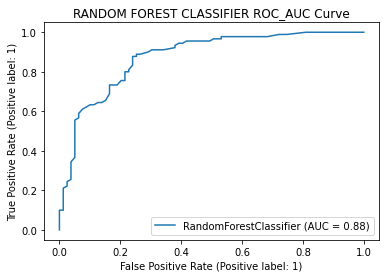

In [143]:
plot_roc_curve(RF,x_test,y_test)
plt.title('RANDOM FOREST CLASSIFIER ROC_AUC Curve')
plt.show()

Model give AUC SCOER is 88% 

We get best model from train test split method is RANDOM FOREST CLASSIFIER.It have best accuracy,best avg and less overfitting

# Try another method for finding best model

# CROSS VAL SCORE METHOD

In [144]:
pred=LO.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(LO,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.6954976303317535 and the test accuracy is 0.7514792899408284


At cross fold  CV 3,and the mean_score is:0.7168504917425945 and the test accuracy is 0.7514792899408284


At cross fold  CV 4,and the mean_score is:0.7156398104265402 and the test accuracy is 0.7514792899408284


At cross fold  CV 5,and the mean_score is:0.7204212454212453 and the test accuracy is 0.7514792899408284


At cross fold  CV 6,and the mean_score is:0.7239361702127659 and the test accuracy is 0.7514792899408284


At cross fold  CV 7,and the mean_score is:0.7240161353797718 and the test accuracy is 0.7514792899408284


At cross fold  CV 8,and the mean_score is:0.7241015274034142 and the test accuracy is 0.7514792899408284


At cross fold  CV 9,and the mean_score is:0.7275731462416432 and the test accuracy is 0.7514792899408284




At cv=9 model give mean score 72.75%

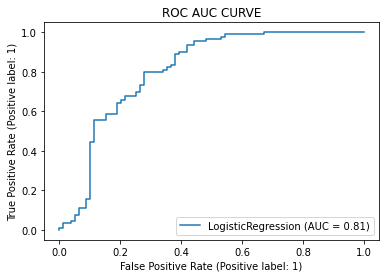

In [145]:
plot_roc_curve(LO,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 81%

# MODEL-->DECISION TREE CLASSIFIER

In [146]:
pred=DT.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(DT,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.721563981042654 and the test accuracy is 0.9704142011834319


At cross fold  CV 3,and the mean_score is:0.6966970377661678 and the test accuracy is 0.9704142011834319


At cross fold  CV 4,and the mean_score is:0.6978672985781991 and the test accuracy is 0.9704142011834319


At cross fold  CV 5,and the mean_score is:0.7038179768949 and the test accuracy is 0.9704142011834319


At cross fold  CV 6,and the mean_score is:0.7180091185410334 and the test accuracy is 0.9704142011834319


At cross fold  CV 7,and the mean_score is:0.716922471467926 and the test accuracy is 0.9704142011834319


At cross fold  CV 8,and the mean_score is:0.7062106918238993 and the test accuracy is 0.9704142011834319


At cross fold  CV 9,and the mean_score is:0.7097663895879407 and the test accuracy is 0.9704142011834319




At cv=2 model give mean score 72.15%

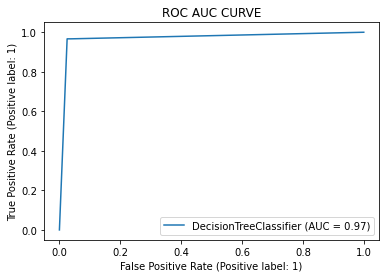

In [147]:
plot_roc_curve(DT,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE is 97%

# MODEL-->SVC

In [148]:
pred=SV.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(SV,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.6990521327014219 and the test accuracy is 0.8284023668639053


At cross fold  CV 3,and the mean_score is:0.7322505741904545 and the test accuracy is 0.8284023668639053


At cross fold  CV 4,and the mean_score is:0.7251184834123222 and the test accuracy is 0.8284023668639053


At cross fold  CV 5,and the mean_score is:0.7334601296139758 and the test accuracy is 0.8284023668639053


At cross fold  CV 6,and the mean_score is:0.744064505234718 and the test accuracy is 0.8284023668639053


At cross fold  CV 7,and the mean_score is:0.7334612357339629 and the test accuracy is 0.8284023668639053


At cross fold  CV 8,and the mean_score is:0.7382637017070979 and the test accuracy is 0.8284023668639053


At cross fold  CV 9,and the mean_score is:0.7535905844073312 and the test accuracy is 0.8284023668639053




At cv=9 model give mean score 75.35%

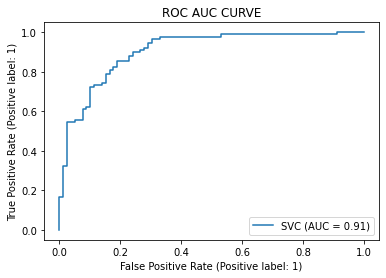

In [149]:
plot_roc_curve(SV,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE is 91%

# MODEL-->KNEIGHBORS CLASSIFIER

In [150]:
pred=KN.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(KN,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.7144549763033176 and the test accuracy is 0.7633136094674556


At cross fold  CV 3,and the mean_score is:0.7393049140607254 and the test accuracy is 0.7633136094674556


At cross fold  CV 4,and the mean_score is:0.726303317535545 and the test accuracy is 0.7633136094674556


At cross fold  CV 5,and the mean_score is:0.7346576500422655 and the test accuracy is 0.7633136094674556


At cross fold  CV 6,and the mean_score is:0.7417088821344141 and the test accuracy is 0.7633136094674556


At cross fold  CV 7,and the mean_score is:0.73461235733963 and the test accuracy is 0.7633136094674556


At cross fold  CV 8,and the mean_score is:0.7239667565139263 and the test accuracy is 0.7633136094674556


At cross fold  CV 9,and the mean_score is:0.7429014464017896 and the test accuracy is 0.7633136094674556




At cv=9 model give mean score 74.29%

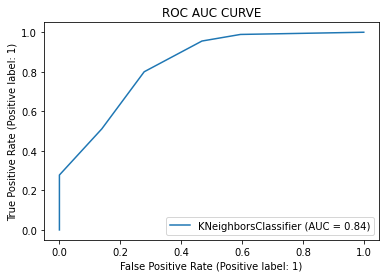

In [151]:
plot_roc_curve(KN,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE is 84%

# MODEL-->ADA BOOST CLASSIFIER

In [152]:
pred=AD.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(AD,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.7049763033175356 and the test accuracy is 0.8284023668639053


At cross fold  CV 3,and the mean_score is:0.7085426078762946 and the test accuracy is 0.8284023668639053


At cross fold  CV 4,and the mean_score is:0.6978672985781991 and the test accuracy is 0.8284023668639053


At cross fold  CV 5,and the mean_score is:0.7061425753733447 and the test accuracy is 0.8284023668639053


At cross fold  CV 6,and the mean_score is:0.7132387706855793 and the test accuracy is 0.8284023668639053


At cross fold  CV 7,and the mean_score is:0.715672963400236 and the test accuracy is 0.8284023668639053


At cross fold  CV 8,and the mean_score is:0.7240902964959568 and the test accuracy is 0.8284023668639053


At cross fold  CV 9,and the mean_score is:0.7227052034876331 and the test accuracy is 0.8284023668639053




At cv=8 model give mean score 72.40%

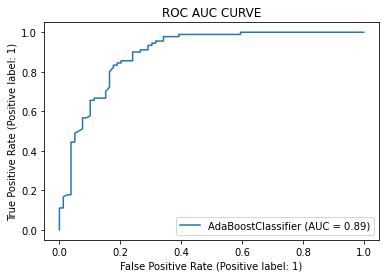

In [153]:
plot_roc_curve(AD,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE is 89%

# MODEL-->GRADIENT BOOSTING CLASSIFIER

In [154]:
pred=GR.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(GR,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.6907582938388626 and the test accuracy is 0.8047337278106509


At cross fold  CV 3,and the mean_score is:0.7227774833211345 and the test accuracy is 0.8047337278106509


At cross fold  CV 4,and the mean_score is:0.731042654028436 and the test accuracy is 0.8047337278106509


At cross fold  CV 5,and the mean_score is:0.733417864187095 and the test accuracy is 0.8047337278106509


At cross fold  CV 6,and the mean_score is:0.7369807497467072 and the test accuracy is 0.8047337278106509


At cross fold  CV 7,and the mean_score is:0.7358717040535222 and the test accuracy is 0.8047337278106509


At cross fold  CV 8,and the mean_score is:0.7501460017969452 and the test accuracy is 0.8047337278106509


At cross fold  CV 9,and the mean_score is:0.738186024047383 and the test accuracy is 0.8047337278106509




At cv=8 model give mean score 75.01%

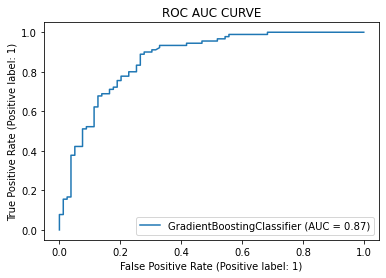

In [155]:
plot_roc_curve(GR,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 87%

# METHOD-->RANDOM FOREST CLASSIFIER

In [156]:
pred=RF.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(RF,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.7511848341232228 and the test accuracy is 0.8047337278106509


At cross fold  CV 3,and the mean_score is:0.7547680943607347 and the test accuracy is 0.8047337278106509


At cross fold  CV 4,and the mean_score is:0.7488151658767772 and the test accuracy is 0.8047337278106509


At cross fold  CV 5,and the mean_score is:0.7583262890955198 and the test accuracy is 0.8047337278106509


At cross fold  CV 6,and the mean_score is:0.7642434988179668 and the test accuracy is 0.8047337278106509


At cross fold  CV 7,and the mean_score is:0.7547914207005118 and the test accuracy is 0.8047337278106509


At cross fold  CV 8,and the mean_score is:0.7560422282120396 and the test accuracy is 0.8047337278106509


At cross fold  CV 9,and the mean_score is:0.7701390477643052 and the test accuracy is 0.8047337278106509




At cv=7 model givemean score 77.01%

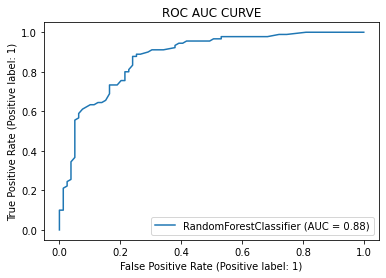

In [157]:
plot_roc_curve(RF,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

Model give AUC SCORE 88%

By cross val score method we find RANDOM FOREST CLASSIFIER as a best model.

# GRID SEARCH CV

In [158]:
dict1={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None'],'n_estimators':[100,200,300,400,500],
      'max_depth':[3,4,5,6,7]}

In [159]:
Gs=GridSearchCV(RF,dict1,cv=9)
Gs

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [160]:
Gs.fit(x,y)

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [161]:
Gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [162]:
Gs.best_score_

0.770177177864206

In [163]:
Gs.best_estimator_

RandomForestClassifier(max_depth=7)

# Analyse model with full feature

In [164]:
Rf=RandomForestClassifier(criterion='gini',max_features='sqrt',n_estimators=100,max_depth=7)
Rf.fit(x_train,y_train)
pred_test=Rf.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score of Model  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(Rf.score(x_train,y_train))*100}")

Confusion Matrix : [[53 26]
 [ 7 83]]
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.67      0.76        79
           1       0.76      0.92      0.83        90

    accuracy                           0.80       169
   macro avg       0.82      0.80      0.80       169
weighted avg       0.82      0.80      0.80       169

Accuracy Score of Model  : 80.4733727810651
Dataset Score : 84.5925925925926


Here by grid searchCV model selection we find best accuracy for model RANDOM FOREST CLASSIFIER
Avg       0.92 
Accuracy score    91.49
Dataset score     95.49
Precision         92%(yes)

# Plot AUC-ROC CURVE For Model

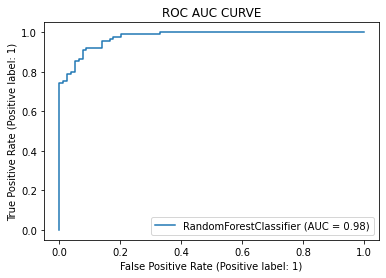

In [165]:
plot_roc_curve(Gs.best_estimator_,x_test,y_test)
plt.title('ROC AUC CURVE')
plt.show()

AUC curve for RANDOM FOREST CLASSIFIER is 99%

# Save the best model

In [166]:
import joblib

In [167]:
joblib.dump(Gs.best_estimator_,'LOAN.pkl')

['LOAN.pkl']